# An introduction to the t-SNE algorithm

First of all, run all the cells! (**Runtime** above ^)



## The beginning

**sklearn.datasets** is a module of the **Scikit-Learn** library that contains functions for loading ready-made datasets.

Now we load the **handwritten digits** datasets. It contains 1797 images with **8*8=64**  pixels each. Handwritten digits dataset: This is a database of images of handwritten numbers (0 to 9), widely used for testing and examples in machine learning.

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

These **1797** images with **64** pixels each alternate cyclically from the number 0 to 9, and each digit has its respective **target**. The numbers aren't perfect and often look strange, but that's the point!

Let's see what's inside **digits**:

In [2]:
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Here, **data** contains our matrices that represent each image, and **target** contains its digit identifier.

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

Let's look at some types of **9** that we have:

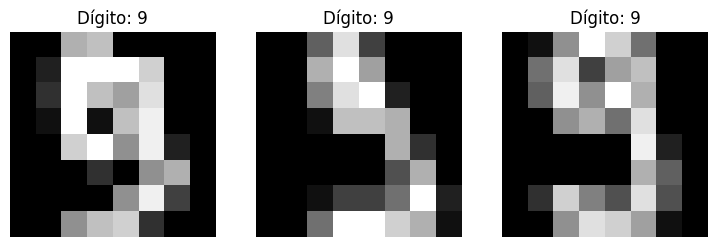

In [4]:
import matplotlib.pyplot as plt

nums = [9, 19, 39]

fig, axs = plt.subplots(1, len(nums), figsize=(3*len(nums),3))

for ax, n in zip(axs, nums):
  ax.imshow(digits.images[n], cmap="gray")
  ax.set_title(f"Dígito: {digits.target[n]}")
  ax.axis("off")

plt.show()


And here we can see the matrix that represents the first image. Notice that the lighter the **bin** color, the higher its value will be in its respective position in the matrix:

In [5]:
digits.images[9]

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

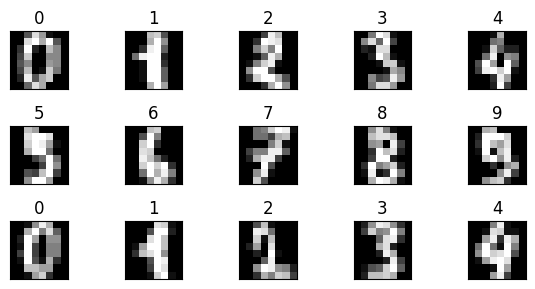

In [6]:
nrows, ncols = 3, 5

plt.figure(figsize=(6,3))
plt.gray()

for i in range(ncols * nrows):

  ax = plt.subplot(nrows, ncols, i + 1)
  ax.imshow(digits.images[i,...])     # plots the imshow of the digits
  plt.xticks([]); plt.yticks([])      # Make the ticks empty.
  plt.title(digits.target[i])

plt.tight_layout()
plt.show()

## t-SNE application

Now let's run the t-SNE algorithm on the dataset. It just takes one line with scikit-learn. But first, let's sort our matrices according to the algorithms that represent them:

In [7]:
import numpy as np

# We first reorder the data points according to the handwritten numbers.

X = np.vstack([digits.data[digits.target==i] for i in range(10)])
y = np.hstack([digits.target[digits.target==i] for i in range(10)])

In [8]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  0.,  3., ...,  4.,  0.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.]])

In [9]:
y

array([0, 0, 0, ..., 9, 9, 9])

Below is an example of using the **TSNE** function from **sklearn.manifold**, where we pass all the parameters we want.

* **learning_rate** is the learning rate of the t-SNE optimization process, which attempts to minimize a cost function (Kullback-Leibler divergence) by adjusting the positions of points in 2D space. The **learning_rate** controls the step size at each iteration.
* **metric** It defines how the distance between two points is calculated in the original space (high dimension). In our case, **Euclidean** means that distances are calculated with $d_{ij} = \sqrt{\sum(x_{ik}-x_{jk})^{2}}$.
* **random_state** Controls the seed of the random number generator. Without random_state, each execution generates a different map.
* **fit_transform()** These method is used to adjust the t-SNE to the data and generate the low-dimensional projection. First, the method analyzes the original data **fit**, identifying which points are closest to each other in high-dimensional space. Then, it calculates the positions of these points in 2D **transform**, so that neighbors in the original space remain neighbors in the final graph.

In [10]:
# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

In [11]:
seed = 20150101

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1500, metric="euclidean", random_state=seed)

digits_proj = tsne.fit_transform(X)

Here are the coordinates of all our **1797** low-dimensional (in this case, 2D) points:

In [12]:
print(f'size: {len(digits_proj)}\ncoordenates:\n')
digits_proj

size: 1797
coordenates:



array([[ -2.8971207, -72.99214  ],
       [ -1.4047283, -69.0771   ],
       [  7.519298 , -68.754005 ],
       ...,
       [-30.43235  , -21.689116 ],
       [-26.83895  , -23.466192 ],
       [-23.987438 , -21.243862 ]], dtype=float32)

The following function is for coloring the plot and assigning cluster numbers and returns the point distribution **sc** and the digits **txts**:

In [13]:
import matplotlib.patheffects as PathEffects

def plot_graph(data, colors):

  fig, ax = plt.subplots(figsize=(5,4))

  sc = ax.scatter(data[:,0], data[:,1], s = 5, c=colors, cmap='tab10')

  txts = []

  for i in range(10):

      xtext, ytext = np.median(digits_proj[colors == i, :], axis=0)                                     # Select all points of the t-SNE that belong to the digit i.
      txt = ax.text(xtext, ytext, str(i), fontsize=12)                                                  # Add the number string to the medians.
      txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()])     # This adds a thick white outline to the text.
      txts.append(txt)

  return fig, ax, sc, txts

The plot below is our result.



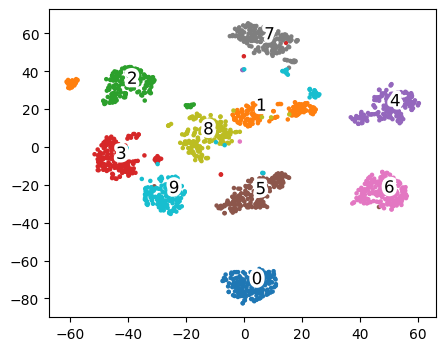

In [14]:
plot_graph(digits_proj, y)

plt.show()

If you want to observe multiple values of **perplexity**, simply adjust the parameters of the **perp** variable.

PS: The code below takes about 1:30 minutes to run.

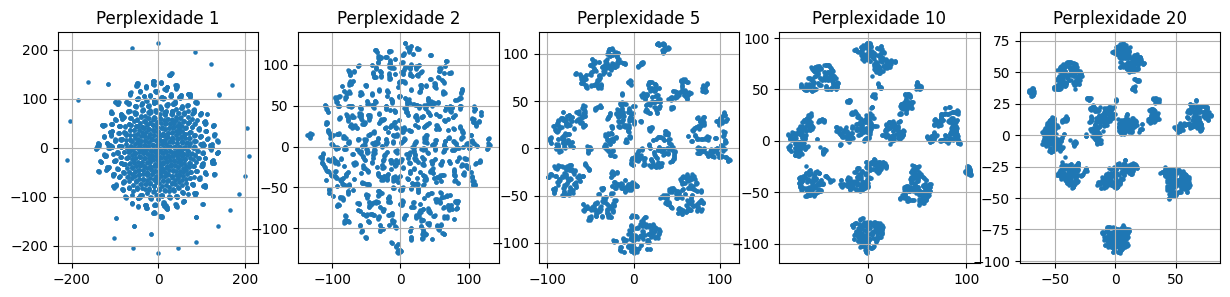

In [15]:
perp = [1, 2, 5, 10, 20]

fig, axs = plt.subplots(1, 5, figsize=(3*len(perp), 3))

for i, p in enumerate(perp):

    tsne = TSNE(n_components=2, perplexity=p, learning_rate=200, max_iter=1500, metric="euclidean", random_state=seed)
    digits_proj = tsne.fit_transform(X)

    axs[i].scatter(digits_proj[:,0], digits_proj[:,1], s=5)
    axs[i].set_title(f"Perplexidade {p}")
    axs[i].grid(True)

plt.show()

Below is an example of our application of t-SNE for higher **perplexity** values. Note that at a certain point the distribution begins to ungroup again, highlighting the need for an appropriate choice of **perplexity** value.

PS: The code below takes about 3:30 minutes to run, in case you want to test other high **perplexity** values.

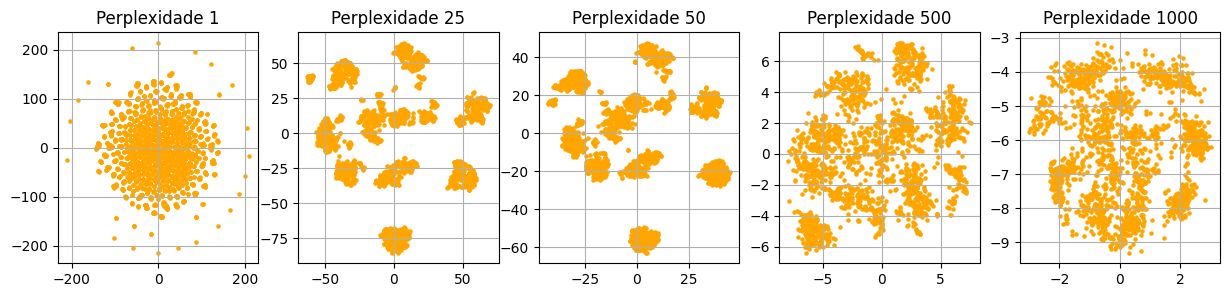

In [16]:
perp = [1, 25, 50, 500, 1000]

fig, axs = plt.subplots(1, 5, figsize=(3*len(perp), 3))

for i, p in enumerate(perp):

    tsne = TSNE(n_components=2, perplexity=p, learning_rate=200, max_iter=1500, metric="euclidean", random_state=seed)
    digits_proj = tsne.fit_transform(X)

    axs[i].scatter(digits_proj[:,0], digits_proj[:,1], s=5, c='orange')
    axs[i].set_title(f"Perplexidade {p}")
    axs[i].grid(True)

plt.show()

## Activities

**TASK 1:** Visually identify a good value for the **perplexity** of this sample ~ plot around good values until you find one that pleases you.

In [ ]:
# perp = [value 1, value 2, value 3, ...]          # modify your perplexities here

fig, axs = plt.subplots(1, 4, figsize=(3*len(perp), 3))

for i, p in enumerate(perp):

    tsne = TSNE(n_components=2, perplexity=p, learning_rate=200, max_iter=1500, metric="euclidean", random_state=seed)
    digits_proj = tsne.fit_transform(X)

    axs[i].scatter(digits_proj[:,0], digits_proj[:,1], s=5, c='green')
    axs[i].set_title(f"Perplexidade {p}")
    axs[i].grid(True)

plt.show()

**TASK 2:** Visually identify a good value for the **learning_rate** of this sample ~ plot around good values until you find one that pleases you. To better visualize this, the number of iterations should be reduced to avoid convergence on the same "correct" result.

In [ ]:
# learning_values = [value 1, value 2, value 3, ...]          # modify your learning_rate values here

fig, axs = plt.subplots(1, 4, figsize=(3*len(learning_values), 3))

for i, lv in enumerate(learning_values):

    tsne = TSNE(n_components=2, perplexity=30, learning_rate=lv, max_iter=300, metric="euclidean", random_state=seed)
    digits_proj = tsne.fit_transform(X)

    axs[i].scatter(digits_proj[:,0], digits_proj[:,1], s=5, c='green')
    axs[i].set_title(f"learning_rate {lv}")
    axs[i].grid(True)

plt.show()

Task **3**:

**TASK 3:** Try creating a **digits** that contains only some digits instead of all 9.

First, let's count the quantity of each digit:

In [ ]:
y

In [ ]:
count = np.bincount(y)
count

Cut your X and Y vectors down to the number you want and place them in the plot below.

In [ ]:
# X2 = ...
# y2 = ...

In [ ]:
seed = 20150101
perp = [1, 5, 20, 50]          # modify your perplexities here

fig, axs = plt.subplots(1, 4, figsize=(3*len(perp), 3))

for i, p in enumerate(perp):

    tsne = TSNE(n_components=2, perplexity=p, learning_rate=200, max_iter=1500, metric="euclidean", random_state=seed)
    digits_proj_2 = tsne.fit_transform(X2)

    axs[i].scatter(digits_proj_2[:,0], digits_proj_2[:,1], s=5, c='violet')
    axs[i].set_title(f"Perplexidade {p}")
    axs[i].grid(True)

plt.show()

## Test with different clusters

In [18]:
from sklearn.datasets import make_circles

np.random.seed(1)

# It generates three very clear clusters
c1 = np.random.normal(loc=-4,  scale=0.5, size=(300, 300))
c2 = np.random.normal(loc=0,  scale=0.5, size=(300, 300))
c3 = np.random.normal(loc=5, scale=0.5, size=(300, 300))
x_clust = np.vstack([c1, c2, c3])

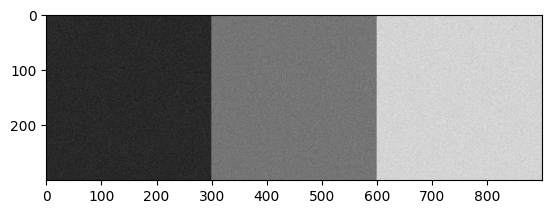

In [19]:
plt.imshow(x_clust.T)

In [20]:
x_clust.shape

(900, 300)

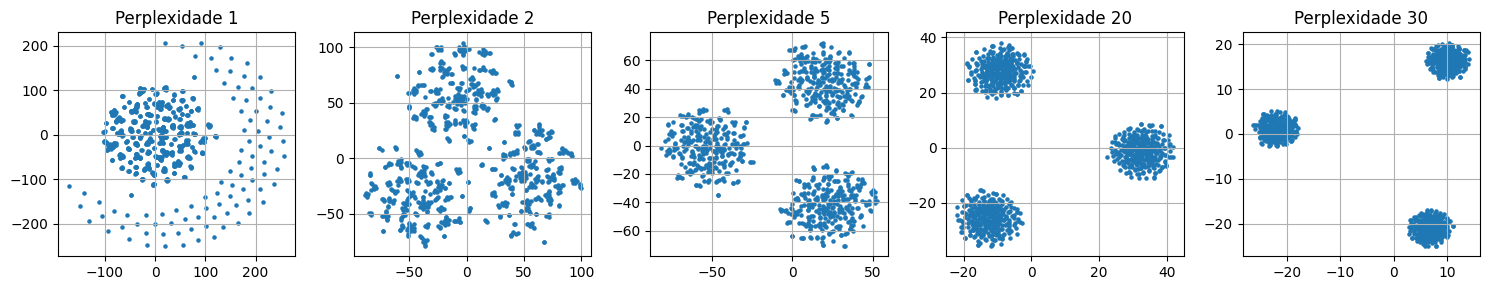

In [21]:
import warnings
warnings.filterwarnings('ignore')

ps = [1, 2, 5, 20, 30]

fig, axs = plt.subplots(1, len(ps), figsize=(3*len(ps), 3))

for i, p in enumerate(ps):

    tsne = TSNE(n_components=2, perplexity=p, learning_rate=200, max_iter=1500, metric="euclidean", random_state=42)
    glitches_2d = tsne.fit_transform(x_clust)

    axs[i].scatter(glitches_2d[:,0], glitches_2d[:,1], s=5)
    axs[i].set_title(f"Perplexidade {p}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [22]:
# Clusters with a non-linear shape - concentric circles
X2d, y = make_circles(n_samples=1000, factor=0.5)
W = np.random.normal(size=(2, 50))
x_circ = X2d @ W + 0.05 * np.random.normal(size=(1000, 50))

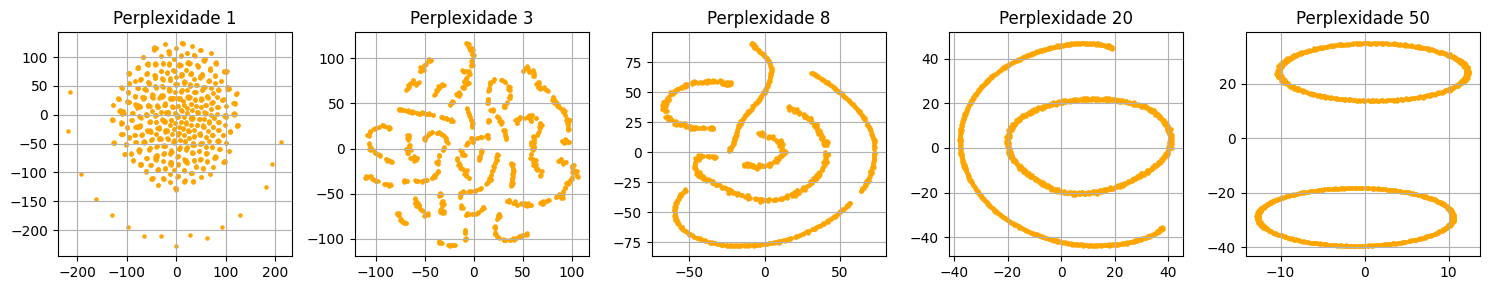

In [23]:
ps2 = [1, 3, 8, 20, 50]

fig, axs = plt.subplots(1, len(ps2), figsize=(3*len(ps2), 3))

for i, p in enumerate(ps2):

    tsne = TSNE(n_components=2, perplexity=p, learning_rate=200, max_iter=1500, metric="euclidean", random_state=42)
    glitches_2d = tsne.fit_transform(x_circ)

    axs[i].scatter(glitches_2d[:,0], glitches_2d[:,1], s=5, c='orange')
    axs[i].set_title(f"Perplexidade {p}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [24]:
# Clusters with different densities
tight = np.random.normal(loc=[0]*30, scale=0.2, size=(300, 30))
mid = np.random.normal(loc=[3]*30, scale=1.0, size=(700, 30))
loose = np.random.normal(loc=[5]*30, scale=2.0, size=(1000, 30))

x_dens = np.vstack([tight, mid, loose])
y = np.array([0]*300 + [1]*700 + [2]*1000)

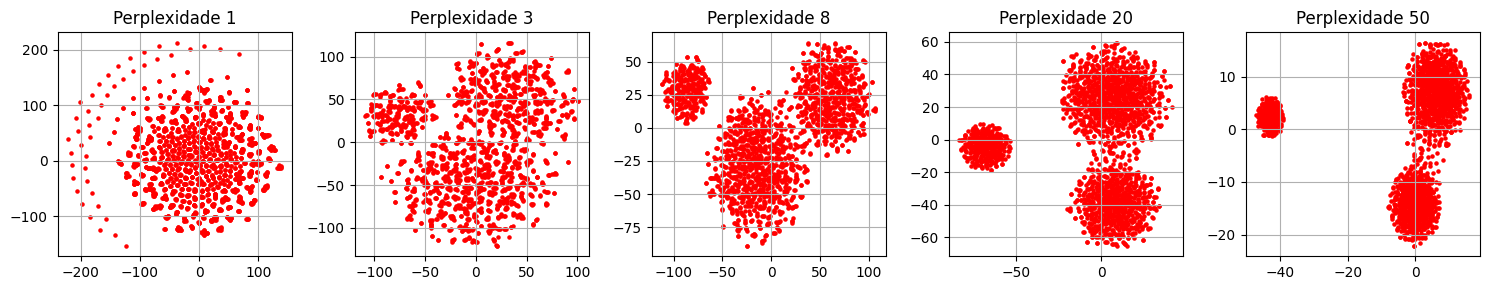

In [25]:
ps3 = [1, 3, 8, 20, 50]

fig, axs = plt.subplots(1, len(ps3), figsize=(3*len(ps3), 3))

for i, p in enumerate(ps3):

    tsne = TSNE(n_components=2, perplexity=p, learning_rate=200, max_iter=1500, metric="euclidean", random_state=42)
    glitches_2d = tsne.fit_transform(x_dens)

    axs[i].scatter(glitches_2d[:,0], glitches_2d[:,1], s=5, c='red')
    axs[i].set_title(f"Perplexidade {p}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()